In [3]:
import csv

import matplotlib.pyplot as plt

import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import abline_plot

import numpy as np

In [5]:
key_title = 'title'
key_platform = 'platform'
key_ign_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'
key_release_q = 'release_quarter'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'
key_critic_score = 'Critic_Score'
key_critic_count = 'Critic_Count'
key_user_score = 'User_Score'
key_user_count = 'User_Count'

keys = [key_title, key_platform, key_ign_score, key_release_y, key_release_m, key_release_d, key_release_q,\
        key_rank, key_genre, key_publisher, key_NA, key_EU, key_JP, key_other, key_global]



In [26]:
def beautify_dict(data):
    need_removing = []
    
    for i in range(0, len(data)):
        if data[i][key_critic_count] == '' or data[i][key_user_count] == '':
            need_removing += [i]
            continue

        data[i][key_ign_score] = float(data[i][key_ign_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])
        data[i][key_critic_count] = int(data[i][key_critic_count])
        data[i][key_critic_score] = float(data[i][key_critic_score]) / 100
        data[i][key_user_count] = int(data[i][key_user_count])
        data[i][key_user_score] = float(data[i][key_user_score])
        
    return [row for row in data if data[i][key_critic_count] != '' or data[i][key_user_count] != '']

fin = open('data/ratings_our_data.csv', 'r')
r_data = csv.DictReader(fin)

r_data = [row for row in r_data]

r_data = beautify_dict(r_data)
    
print(r_data[0])

OrderedDict([('title', 'LittleBigPlanet PS Vita'), ('platform', 'PlayStation Vita'), ('score', 9.0), ('release_year', 2012), ('release_month', 9), ('release_day', 12), ('Rank', 1298), ('Genre', 'Platform'), ('Publisher', 'Sony Computer Entertainment'), ('NA_Sales', 0.4), ('EU_Sales', 0.72), ('JP_Sales', 0.02), ('Other_Sales', 0.33), ('Global_Sales', 1.47), ('Critic_Score', 0.88), ('Critic_Count', 71), ('User_Score', 8.6), ('User_Count', 348), ('release_quarter', 'Q3')])


## Weighted std

### LRG using the different scores

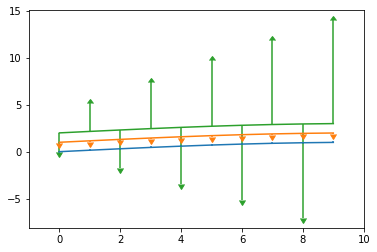

In [35]:
def gen_y_error(data, real_value, noise, key, times):   
    worst_error = 0
    
    for _ in range(times):
        temp_data = [dict(row) for row in data]
        
        for i in range(len(temp_data)):
            temp_data[i][key] += random.uniform(-noise, noise)
            
        # calc lin model
        
        # calc accuracy
        
        if abs(real_value - noisy_accuracy) > worst_error:
            worst_error = abs(real_value - noisy_accuracy)
            
    return worst_error

def lol(x, data):
    return x + data[0]

data3 = [2,3,4]
fig = plt.figure(0)
x = np.arange(10.0)
y = np.sin(np.arange(10.0) / 20.0 * np.pi)

plt.errorbar(x, y, yerr=0.1)

y = np.sin(np.arange(10.0) / 20.0 * np.pi) + 1
plt.errorbar(x, y, yerr=0.1, uplims=True)

y = np.sin(np.arange(10.0) / 20.0 * np.pi) + 2
upperlimits = np.array([1, 0] * 5)
lowerlimits = np.array([0, 1] * 5)
# lol = x
plt.errorbar(x, y, yerr=lol(x, data3), uplims=upperlimits, lolims=lowerlimits)

plt.xlim(-1, 10)
plt.show()